In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Handwritten digits data set

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# This is Handwritten digits classification dataset. The aim is to classify the image in range from 0 to 9.
# This is multiclassification task.
# First attempt is to check with CNN model.

# Basic checks

In [4]:
len(x_train)

60000

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
# we have 60000 images in x_train and image size is 28 by 28 grid.

In [7]:
len(x_test)

10000

# Data or Image visualization

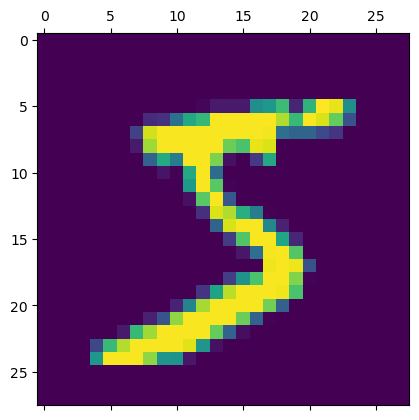

In [8]:
plt.matshow(x_train[0]) # matshow displays an array as a matrix in new figure window

(28, 28)

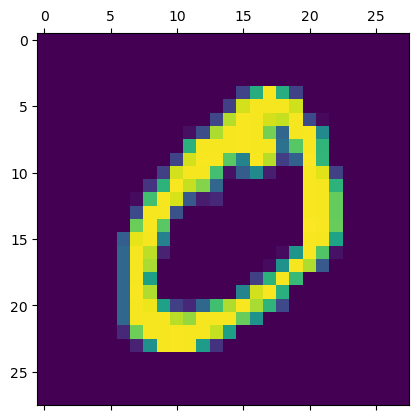

In [9]:
plt.matshow(x_train[1])
x_train[1].shape

# Data pre processing

In [10]:
x_train[0], # its a two dimensional array
# o is black and 255 is white

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

# Scaling of the data

In [11]:
# The values are ranging from 0 to 255 which needs to be scaled in between o to 1 before fitting into a model
# Here the highest value is 255. So it should be divided by 255 to get values in between 0 & 1.

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Data flattening : Coversion of two dimensional array to one dimension

In [14]:
# image is 28 by 28 grid and two dimensional array.
# Two dimensional array need to be converted to one dimension before fitting.
# This process is called flattening.
# Since it is 28 by 28 grid, then we should get 784(28*28) elements in one dimensional array

In [15]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [16]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [17]:
len(x_train_flattened[0])

784

In [18]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

# Creation of KNN model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

###  K vs Error rate

In [20]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_flattened,y_train)
    pred_i=knn.predict(x_test_flattened)
    error_rate.append(np.mean(pred_i!=y_test))

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Text(0, 0.5, 'Error rate')

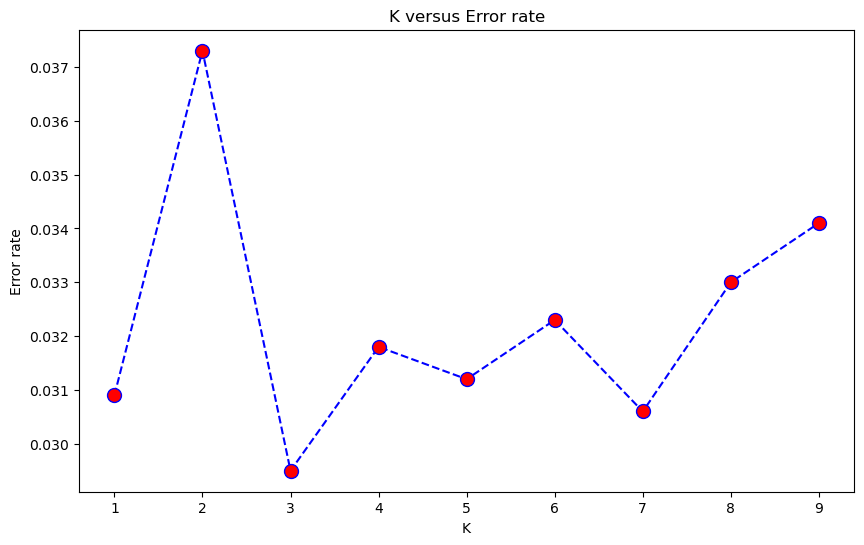

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='--',markersize=10,markerfacecolor='red',marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel("Error rate")

In [23]:
# based on the above graph, after stabilization the error rate is less at K = 7.

# Model fitting

In [25]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_flattened,y_train)
pred_i=knn.predict(x_test_flattened)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Model prediction

In [26]:
y_predict= knn.predict(x_test_flattened)
y_predict[1]

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


2

In [29]:
y_test[1]

2

# Model evaluation by importing metrics

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [31]:
Accuracy = accuracy_score(y_test,y_predict)
Accuracy

0.9694

In [32]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  988,    2,    1,    0,    2,   16,    4,    0],
       [   0,    3,    2,  976,    1,   12,    1,    7,    4,    4],
       [   1,    8,    0,    0,  945,    0,    5,    1,    1,   21],
       [   5,    0,    0,    8,    2,  866,    4,    1,    2,    4],
       [   6,    3,    0,    0,    3,    2,  944,    0,    0,    0],
       [   0,   25,    3,    0,    1,    0,    0,  989,    0,   10],
       [   6,    4,    6,   11,    7,   12,    1,    6,  916,    5],
       [   5,    6,    3,    6,    8,    4,    1,   11,    2,  963]],
      dtype=int64)

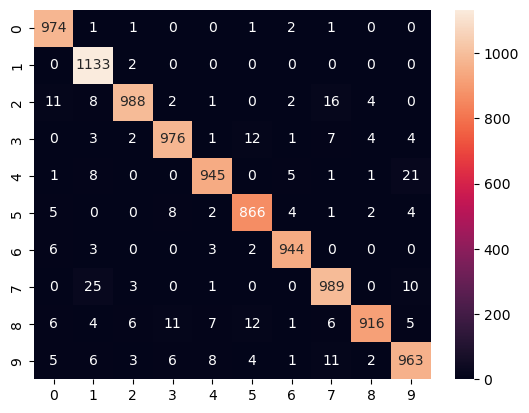

In [33]:
heatmap = sns.heatmap(cm,annot=True,fmt='d')

In [34]:
classification = classification_report(y_test,y_predict)
print(classification)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

